In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns



In [2]:
channel_ids = [
               'UC0C-w0YjGpqDXGB8IHb662A',
               'UCtxD0x6AuNNqdXO9Wp5GHew',
               'UC9CoOnJkIBMdeijd9qYoT_g',
               'UCqECaJ8Gagnn7YCbPEzWH6g'
              ]

youtube = build('youtube', 'v3', developerKey='')


Function to get Youtube Channel stats

In [3]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics', id=','.join(channel_ids))
    response = request.execute()
    
    
    for i in range(len(response['items'])):
        data = {
            'Channel_name': response['items'][i]['snippet']['title'],
            'Subscribers': response['items'][i]['statistics']['subscriberCount'],
            'Views': response['items'][i]['statistics']['viewCount'],
            'Videos': response['items'][i]['statistics']['videoCount'],
            'Playlists':response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
    
    
    return all_data

In [4]:
channel_statistics = get_channel_stats(youtube,channel_ids)

In [5]:
channel_data = pd.DataFrame(channel_statistics)

In [6]:
channel_data

,Channel_name,Subscribers,Views,Videos,Playlists
0,Ariana Grande,54600000,26748920529,202,UU9CoOnJkIBMdeijd9qYoT_g
1,Taylor Swift,59900000,36540766165,273,UUqECaJ8Gagnn7YCbPEzWH6g
2,Ed Sheeran,55000000,32763135057,519,UU0C-w0YjGpqDXGB8IHb662A
3,UR · Cristiano,57500000,396835390,30,UUtxD0x6AuNNqdXO9Wp5GHew


In [7]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Videos'] = pd.to_numeric(channel_data['Videos'])
channel_data.dtypes


Channel_name    object
Subscribers      int64
Views            int64
Videos           int64
Playlists       object
dtype: object

Comparing the subscribers of UR Cristiano with other channels

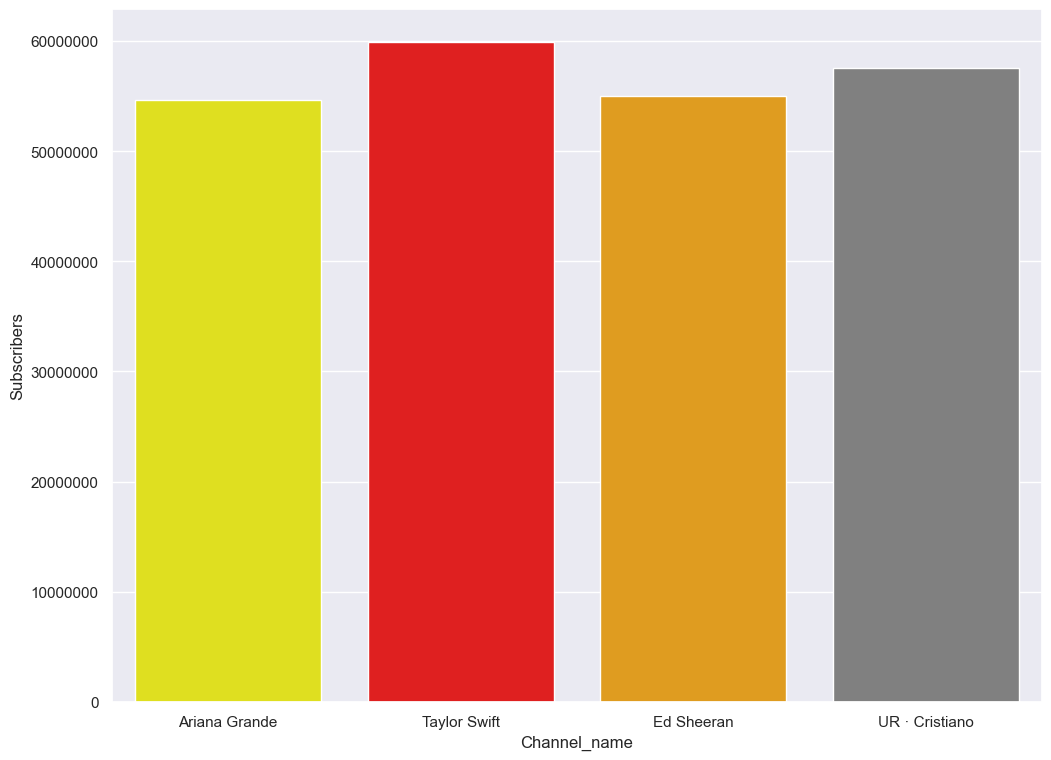

In [8]:
sns.set(rc={'figure.figsize':(12,9)})
colors = ['#FFFF00', '#FF0000', '#FFA500', '#808080']
ax = sns.barplot(x='Channel_name',y='Subscribers', data=channel_data, hue='Channel_name', palette=colors, legend=False)
ax.ticklabel_format(style='plain', axis='y')

Comparing the Views of UR Cristiano with other channels

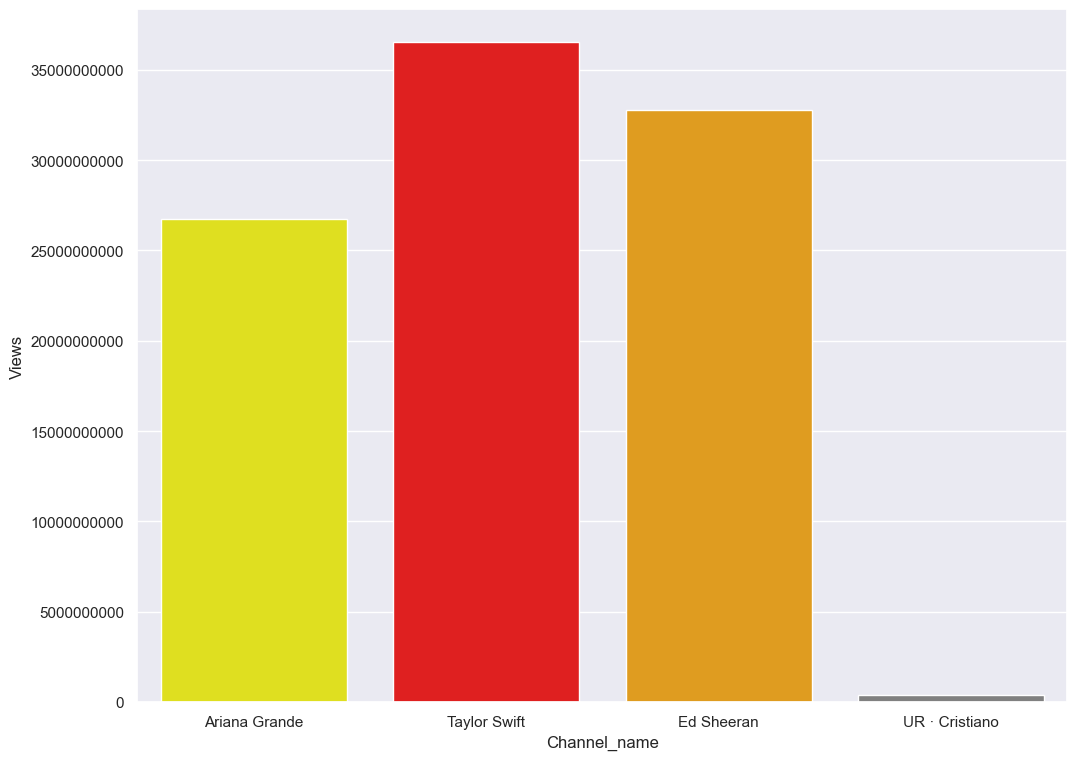

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
colors = ['#FFFF00', '#FF0000', '#FFA500', '#808080']
ax = sns.barplot(x='Channel_name',y='Views', data=channel_data, hue='Channel_name', palette=colors, legend=False)
ax.ticklabel_format(style='plain', axis='y')

In [10]:
playlist = channel_data.loc[channel_data['Channel_name']=='UR · Cristiano', 'Playlists'].iloc[0]

Function to get Video IDs

In [11]:
def get_video_ids(youtube, playlist):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist,
                maxResults = 15)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist,
                        maxResults = 15,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [12]:
video_ids = get_video_ids(youtube, playlist)

In [13]:
video_ids

['etps-RdsTz0',
 'e9CkkiPCo30',
 'zuRujkxTv2Y',
 '55U2mLxARC4',
 'i0GnOGG5Q-Y',
 'C850U295CX4',
 'eh0kXm62W9A',
 'M8KHrlhDNIY',
 'TFtR0HLJluc',
 'tizVemSwwmc',
 '7JZPEeZFjKw',
 'PbgUg_aBHf4',
 'HQ8gIrd4Gyo',
 'I74FAkaL1Fk',
 '6huYOWoyY0g',
 'ZkuaJYurYHw',
 'E9WcwprYcSw',
 '2aAH-B3hGaQ',
 's0QxGOHjhFI',
 'Xa53WiSFxMw',
 '-vwNPsvZ0Sc',
 '35S7zTBFRhQ',
 'GqYpn_s1Hjg',
 'hKR57pX7-fY',
 '6BnBh01LOgA',
 'ORc2270vgqs',
 'eWFxXJf5D_M',
 'QdtDGyc3818',
 'DhFZd3dlOQI',
 'jeDKsg8r3ew']

Function to get Video Details

In [14]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 15):  
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+15])
        )
        response = request.execute()

        for video in response['items']:
            video_stats = {
                'Title': video['snippet']['title'],
                'Published_date': video['snippet']['publishedAt'],
                'Views': video['statistics'].get('viewCount', 'N/A'),
                'Likes': video['statistics'].get('likeCount', 'N/A'),
                'Comments': video['statistics'].get('commentCount', 'N/A')
            }
            all_video_stats.append(video_stats)
    
    return all_video_stats


In [15]:
video_details = get_video_details(youtube, video_ids)

In [16]:
video_details

[{'Title': 'Cristiano Ronaldo diciendo "Qué mirás bobo"!',
  'Published_date': '2024-09-04T12:48:36Z',
  'Views': '1175860',
  'Likes': '230122',
  'Comments': '9161'},
 {'Title': 'Soy Georgina Temporada 3... ¡con Cristiano!',
  'Published_date': '2024-09-04T11:35:35Z',
  'Views': '599148',
  'Likes': '119427',
  'Comments': '4014'},
 {'Title': 'Las 7 preguntas que siempre quise hacerle a Georgina',
  'Published_date': '2024-09-03T13:01:08Z',
  'Views': '5149608',
  'Likes': '709369',
  'Comments': '30088'},
 {'Title': 'The real reason why I cried in Euro 24',
  'Published_date': '2024-09-01T13:00:04Z',
  'Views': '5385101',
  'Likes': '683258',
  'Comments': '43961'},
 {'Title': 'MY GOAL: 1000 GOALS',
  'Published_date': '2024-08-31T13:00:51Z',
  'Views': '6122662',
  'Likes': '788599',
  'Comments': '44135'},
 {'Title': 'A day in the life of Cristiano Ronaldo (Champions League Award Edition)',
  'Published_date': '2024-08-30T11:34:18Z',
  'Views': '6674803',
  'Likes': '892634',
  'C

In [17]:
video_detail = pd.DataFrame(video_details)

In [18]:
video_detail['Published_date'] = pd.to_datetime(video_detail['Published_date']).dt.date
video_detail['Views'] = pd.to_numeric(video_detail['Views'], errors='coerce')
video_detail['Likes'] = pd.to_numeric(video_detail['Likes'], errors='coerce')
video_detail['Comments'] = pd.to_numeric(video_detail['Comments'], errors='coerce')



In [19]:
top5_videos = video_detail.sort_values(by='Comments', ascending=False).head(5)

In [20]:
top5_videos

,Title,Published_date,Views,Likes,Comments
11,The golden button… for my golden kids,2024-08-21,48994458,4318276,243978
13,Descúbrelo TODO sobre nosotros. ¿Quién ganará?,2024-08-21,43523746,3716740,202526
10,"“Bernabéu… pressure… 90,000” 🔥🔥🔥",2024-08-24,19145827,2386779,174088
14,Welcome to my new YouTube Channel!!,2024-08-21,28499928,4312479,153707
9,Georgina CALIFICA mis outfits de los últimos 2...,2024-08-26,20119321,2258990,122233


Visualization of the Top 5 commented videos of UR Cristiano

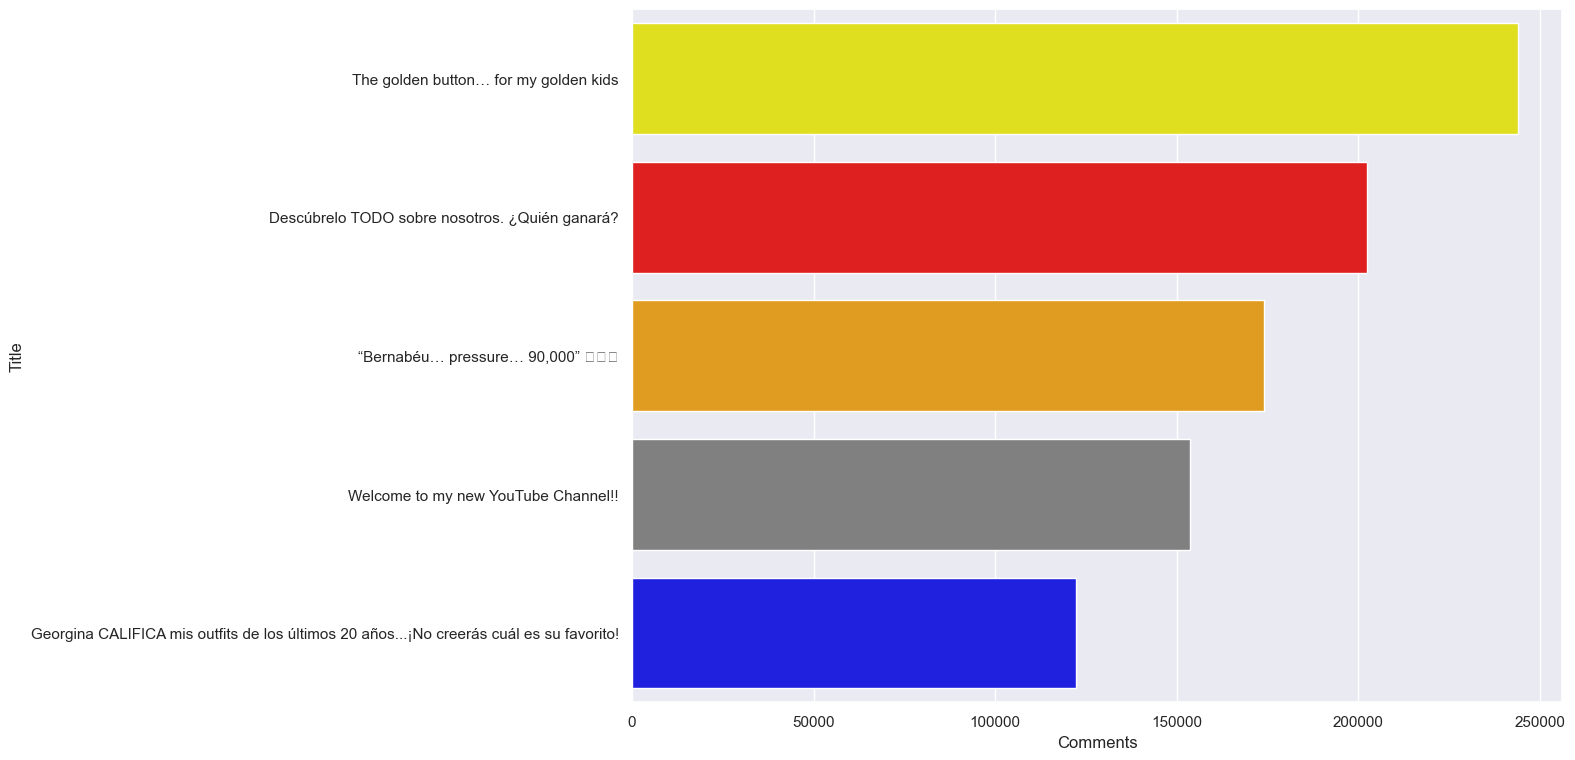

In [21]:
colors = ['#FFFF00', '#FF0000', '#FFA500', '#808080', '#0000FF']
sns.set(font='Arial')
ax1 = sns.barplot(x='Comments', y='Title', data=top5_videos, hue='Title', palette=colors, legend=False)
